### 背景描述
- 看电影已经是人们生活中很重要的一项娱乐活动了，那么你了解电影为什么大部分在90到120分钟吗？本项目将会带着你从电影的多个指标，如导演、票房、类型、年代等多个指标进行可视化分析的练习，让你不仅掌握可视化技术，还能重温那些经典的电影哦。
- IMDB 是目前全球互联网中最大的一个电影资料库，在该电影资料库中有丰富的电影作品信息，包括影片演员、导演、电影题材、片长、剧情关键字、分级、评分等关于影片的基本信息，其中使用最多的就是IMDB的评分。

### 难度 2
### 知识点
- Pandas、Matplotlib

### 数据说明
-在该电影数据集中包含有28个属性。

- color：画面颜色
- director_name：导演姓名
- director_facebook_likes：脸书喜欢该导演的人数
- facenumber_in_poster：海报中的人脸数量
- movie_title：电影片名
- title_year：电影年份
- duration：电影时长
- country：国家
- genres：电影题材
- gross：总票房
- actor_1_name：男一号演员姓名
- actor_2_name：男二号演员姓名
- actor_3_name：男三号演员姓名
- actor_1_facebook_likes：脸书上喜爱男一号的人数
- actor_2_facebook_likes：脸书上喜爱男二号的人数
- actor_3_facebook_likes：脸书上喜爱男三号的人数
- aspect_ratio：画布的比例
- content_rating：电影分级
- plot_keywords：剧情关键字
- language：语言
- budget：制作成本
- cast_total_facebook_likes：脸书上投喜爱的总数
- movie_facebook_likes：脸书上被点赞的数量
- movie_imdb_link：imdb地址
- imdb_score：imdb上的评分
- num_voted_users：参与投票的用户数量
- num_critic_for_reviews：评论家评论的数量
- num_user_for_reiews： 用户的评论数量

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'movie_metadata.csv'
data = pd.read_csv(path)
data.shape

(5043, 28)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [4]:
# 基本统计信息
data.describe().T

count          mean           std      min  \
num_critic_for_reviews     4993.0  1.401943e+02  1.216017e+02     1.00   
duration                   5028.0  1.072011e+02  2.519744e+01     7.00   
director_facebook_likes    4939.0  6.865092e+02  2.813329e+03     0.00   
actor_3_facebook_likes     5020.0  6.450098e+02  1.665042e+03     0.00   
actor_1_facebook_likes     5036.0  6.560047e+03  1.502076e+04     0.00   
gross                      4159.0  4.846841e+07  6.845299e+07   162.00   
num_voted_users            5043.0  8.366816e+04  1.384853e+05     5.00   
cast_total_facebook_likes  5043.0  9.699064e+03  1.816380e+04     0.00   
facenumber_in_poster       5030.0  1.371173e+00  2.013576e+00     0.00   
num_user_for_reviews       5022.0  2.727708e+02  3.779829e+02     1.00   
budget                     4551.0  3.975262e+07  2.061149e+08   218.00   
title_year                 4935.0  2.002471e+03  1.247460e+01  1916.00   
actor_2_facebook_likes     5030.0  1.651754e+03  4.042439e+03     0.00   
imdb_score                 5043.0  6.442138e+00  1.125116e+00     1.60   
aspect_ratio               4714.0  2.220403e+00  1.385113e+00     1.18   
movie_facebook_likes       5043.0  7.525965e+03  1.932045e+04     0.00   

                                  25%          50%          75%           max  
num_critic_for_reviews          50.00       110.00       195.00  8.130000e+02  
duration                        93.00       103.00       118.00  5.110000e+02  
director_facebook_likes          7.00        49.00       194.50  2.300000e+04  
actor_3_facebook_likes         133.00       371.50       636.00  2.300000e+04  
actor_1_facebook_likes         614.00       988.00     11000.00  6.400000e+05  
gross                      5340987.50  25517500.00  62309437.50  7.605058e+08  
num_voted_users               8593.50     34359.00     96309.00  1.689764e+06  
cast_total_facebook_likes     1411.00      3090.00     13756.50  6.567300e+05  
facenumber_in_poster             0.00         1.00         2.00  4.300000e+01  
num_user_for_reviews            65.00       156.00       326.00  5.060000e+03  
budget                     6000000.00  20000000.00  45000000.00  1.221550e+10  
title_year                    1999.00      2005.00      2011.00  2.016000e+03  
actor_2_facebook_likes         281.00       595.00       918.00  1.370000e+05  
imdb_score                       5.80         6.60         7.20  9.500000e+00  
aspect_ratio                     1.85         2.35         2.35  1.600000e+01  
movie_facebook_likes             0.00       166.00      3000.00  3.490000e+05

### 数据清洗
- 去除重复值
- 去除缺失值

In [5]:
# 保留第一次出现的项
data.drop_duplicates(keep='first',inplace=True)
data.shape

(4998, 28)

In [6]:
# 去除缺失值(后续可以考虑填充缺失值)
data = data.dropna()
data.shape

(3723, 28)

In [7]:
# 查看清洗后的数据情况
data.describe().T

count          mean           std      min  \
num_critic_for_reviews     3723.0  1.670406e+02  1.233451e+02     2.00   
duration                   3723.0  1.102635e+02  2.267832e+01    37.00   
director_facebook_likes    3723.0  8.098644e+02  3.076624e+03     0.00   
actor_3_facebook_likes     3723.0  7.650102e+02  1.868842e+03     0.00   
actor_1_facebook_likes     3723.0  7.743336e+03  1.555795e+04     0.00   
gross                      3723.0  5.248034e+07  6.980333e+07   162.00   
num_voted_users            3723.0  1.055543e+05  1.515651e+05    91.00   
cast_total_facebook_likes  3723.0  1.149497e+04  1.911327e+04     0.00   
facenumber_in_poster       3723.0  1.376041e+00  2.045134e+00     0.00   
num_user_for_reviews       3723.0  3.358977e+02  4.110786e+02     4.00   
budget                     3723.0  4.623049e+07  2.269511e+08   218.00   
title_year                 3723.0  2.002965e+03  9.892253e+00  1927.00   
actor_2_facebook_likes     3723.0  2.009926e+03  4.531151e+03     0.00   
imdb_score                 3723.0  6.465673e+00  1.053644e+00     1.60   
aspect_ratio               3723.0  2.110682e+00  3.538792e-01     1.18   
movie_facebook_likes       3723.0  9.299498e+03  2.142665e+04     0.00   

                                   25%          50%          75%           max  
num_critic_for_reviews           77.00       138.00       224.00  8.130000e+02  
duration                         96.00       106.00       120.00  3.300000e+02  
director_facebook_likes          11.00        63.00       235.00  2.300000e+04  
actor_3_facebook_likes          194.00       436.00       690.00  2.300000e+04  
actor_1_facebook_likes          744.50      1000.00     13000.00  6.400000e+05  
gross                       8124330.00  30050028.00  66901813.50  7.605058e+08  
num_voted_users               19598.50     53977.00    128524.00  1.689764e+06  
cast_total_facebook_likes      1907.00      4050.00     16232.50  6.567300e+05  
facenumber_in_poster              0.00         1.00         2.00  4.300000e+01  
num_user_for_reviews            109.00       209.00       398.00  5.060000e+03  
budget                     10000000.00  25000000.00  50000000.00  1.221550e+10  
title_year                     1999.00      2004.00      2010.00  2.016000e+03  
actor_2_facebook_likes          383.50       683.00       975.00  1.370000e+05  
imdb_score                        5.90         6.60         7.20  9.300000e+00  
aspect_ratio                      1.85         2.35         2.35  1.600000e+01  
movie_facebook_likes              0.00       226.00     11000.00  3.490000e+05

### 可视化
####  1) 电影出品国及地区的情况分析

In [8]:
#  统计电影量排名前10的国家及地区
group_head_10 = data.groupby(['country']).size().sort_values(ascending=False).head(10)
group_head_10

country
USA          2961
UK            313
France        101
Germany        79
Canada         59
Australia      39
Spain          21
Japan          15
Hong Kong      13
China          12
dtype: int64

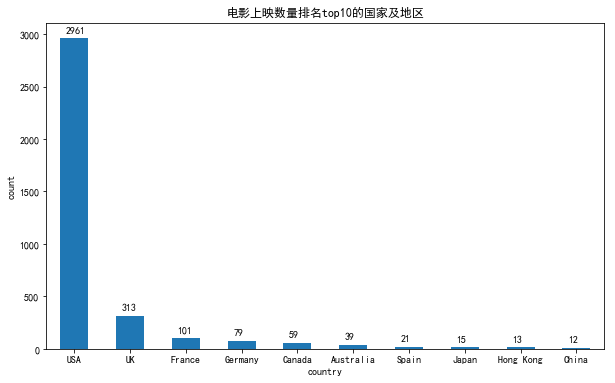

In [9]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False # 解决负号无法正常显示的问题
# 绘制柱形图
plt.figure(figsize=(10,6))
group_head_10.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('count')
plt.title('电影上映数量排名top10的国家及地区')

# 给柱形图添加数据标注
for x, y in enumerate(group_head_10):
    plt.text(x-0.15,y+50,"%s"%y)

plt.show()

In [10]:
data['language'].value_counts()[:10]

English      3566
French         34
Spanish        23
Mandarin       14
Japanese       10
German         10
Cantonese       7
Italian         7
Korean          5
Hindi           5
Name: language, dtype: int64

- IMDB上的电影,高产地区主要集中在欧美

#### 2) 电影数量分析
##### 按年份统计每年电影总数量、彩色影片数量和黑白影片数量

In [11]:
group_year = data.groupby('title_year').size()
group_year

title_year
1927.0      1
1929.0      1
1933.0      1
1935.0      1
1936.0      1
         ... 
2012.0    155
2013.0    162
2014.0    142
2015.0    125
2016.0     58
Length: 74, dtype: int64

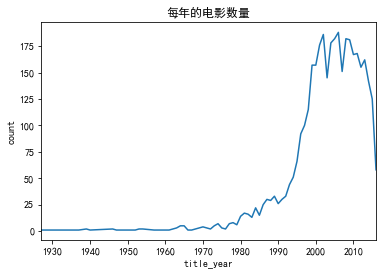

In [12]:
# 可视化
group_year.plot()
plt.ylabel('count')
plt.title('每年的电影数量')
plt.show()

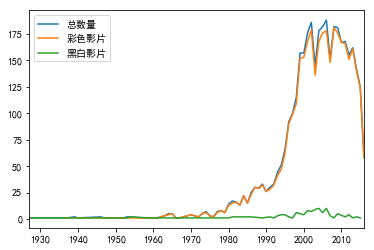

In [13]:
data['title_year'].value_counts().sort_index().plot(kind='line',label='总数量')
color_index = (data['color'] =='Color')
data[color_index]['title_year'].value_counts().sort_index().plot(kind='line',label='彩色影片')
ncolor_index = (data['color'] !='Color')
data[ncolor_index]['title_year'].value_counts().sort_index().plot(kind='line',label='黑白影片')

plt.legend()
plt.show()

- 上世纪80年代左右，电影开始飞速发展，其中电影类型主要为彩色电影

### 3) 电影题材分析
#### genres(电影题材)的格式为"Action|Adventure|Fantasy|Sci-Fi"

In [14]:
data.genres.head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
5            Action|Adventure|Sci-Fi
Name: genres, dtype: object

In [15]:
# explode 可以将一行分成多行
genres = data['genres'].str.split('|').explode().value_counts()
genres

Drama          1876
Comedy         1455
Thriller       1105
Action          951
Romance         851
Adventure       773
Crime           704
Fantasy         504
Sci-Fi          492
Family          440
Horror          386
Mystery         378
Biography       238
Animation       196
War             150
Music           149
History         147
Sport           147
Musical          96
Western          57
Documentary      45
Film-Noir         1
Name: genres, dtype: int64

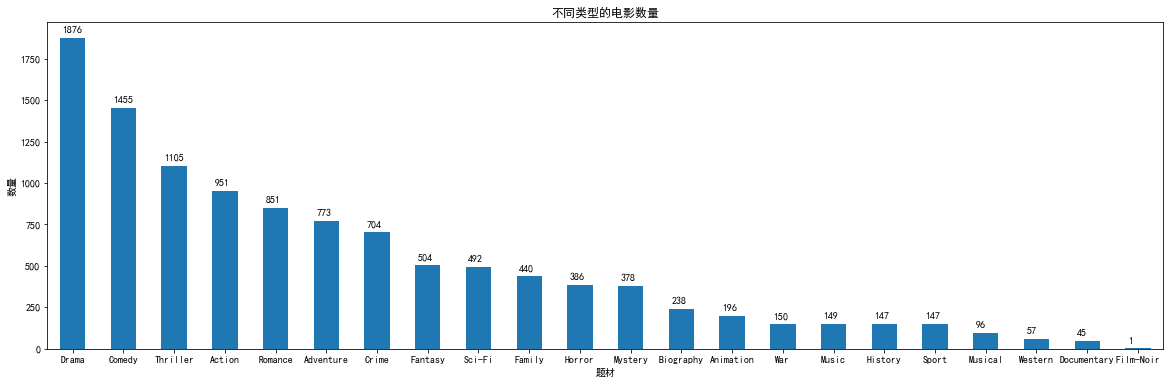

In [16]:
# 绘制柱形图
plt.figure(figsize=(20,6))
genres.plot(kind='bar')

# 给柱形图添加数据标注
for x, y in enumerate(genres):
    plt.text(x-0.2,y+30,"%s"%y)

plt.title('不同类型的电影数量')
plt.xlabel('题材')
plt.ylabel('数量')
plt.xticks(rotation=0)
plt.show()

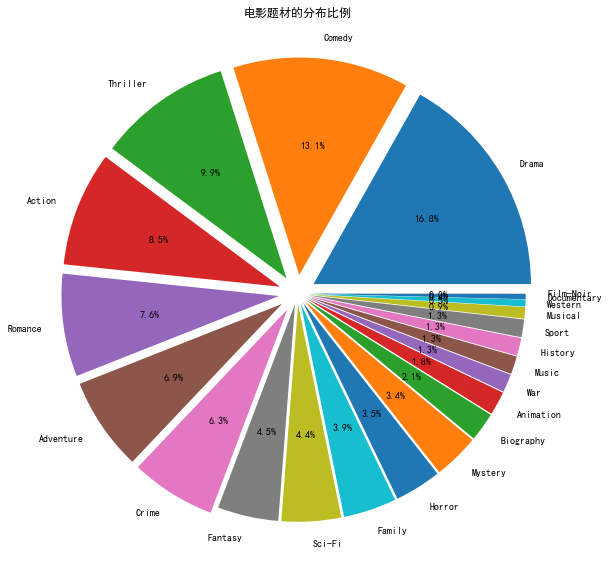

In [17]:
# 绘制饼图
scale = genres/genres.sum()
# 偏移扇区
explode = (scale>=0.06)/28+0.05
genres.plot.pie(autopct="%1.1f%%",figsize=(10,10),label='',explode=explode)
plt.title('电影题材的分布比例')
plt.show()

### 剧情片（Drama）、喜剧片（Comedy）、惊悚片（Thriller）、动作片（Action）、爱情片（Romance）是产量较高的几种电影类型

## 电影票房相关分析

In [18]:
# 每年票房统计
year_gross = data.groupby('title_year')['gross'].sum()
year_gross

title_year
1927.0    2.643500e+04
1929.0    2.808000e+06
1933.0    2.300000e+06
1935.0    3.000000e+06
1936.0    1.632450e+05
              ...     
2012.0    9.934463e+09
2013.0    1.046331e+10
2014.0    1.009292e+10
2015.0    9.197207e+09
2016.0    5.256260e+09
Name: gross, Length: 74, dtype: float64

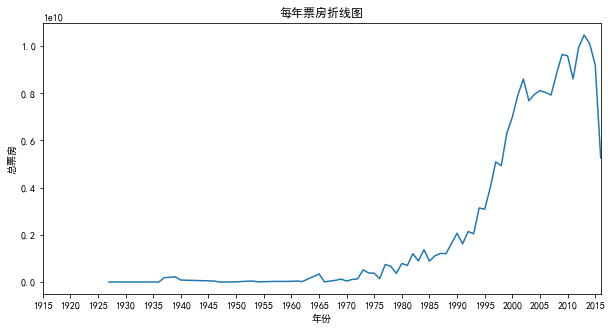

In [19]:
# 每年电影总票房
year_gross.plot(figsize=(10,5))
plt.xticks(range(1915,2018,5))
plt.xlabel('年份')
plt.ylabel('总票房')
plt.title('每年票房折线图')
plt.show()

- 电影票房收入从20世纪90年代后高速增长

In [20]:
# 查看票房收入排名前20位电影片名和类型
gross_top20 = data.sort_values(['gross'],ascending=False).head(20)
gross_top20[['movie_title','gross','genres']]

movie_title        gross  \
0                                         Avatar   760505847.0   
26                                       Titanic   658672302.0   
29                                Jurassic World   652177271.0   
17                                  The Avengers   623279547.0   
66                               The Dark Knight   533316061.0   
240    Star Wars: Episode I - The Phantom Menace   474544677.0   
3024          Star Wars: Episode IV - A New Hope   460935665.0   
8                        Avengers: Age of Ultron   458991599.0   
3                          The Dark Knight Rises   448130642.0   
582                                      Shrek 2   436471036.0   
3080                  E.T. the Extra-Terrestrial   434949459.0   
186              The Hunger Games: Catching Fire   424645577.0   
13    Pirates of the Caribbean: Dead Man's Chest   423032628.0   
509                                The Lion King   422783777.0   
43                                   Toy Story 3   414984497.0   
32                                    Iron Man 3   408992272.0   
439                             The Hunger Games   407999255.0   
27                    Captain America: Civil War   407197282.0   
161                                   Spider-Man   403706375.0   
36           Transformers: Revenge of the Fallen   402076689.0   

                                                 genres  
0                       Action|Adventure|Fantasy|Sci-Fi  
26                                        Drama|Romance  
29                     Action|Adventure|Sci-Fi|Thriller  
17                              Action|Adventure|Sci-Fi  
66                          Action|Crime|Drama|Thriller  
240                     Action|Adventure|Fantasy|Sci-Fi  
3024                    Action|Adventure|Fantasy|Sci-Fi  
8                               Action|Adventure|Sci-Fi  
3                                       Action|Thriller  
582   Adventure|Animation|Comedy|Family|Fantasy|Romance  
3080                                      Family|Sci-Fi  
186                           Adventure|Sci-Fi|Thriller  
13                             Action|Adventure|Fantasy  
509            Adventure|Animation|Drama|Family|Musical  
43            Adventure|Animation|Comedy|Family|Fantasy  
32                              Action|Adventure|Sci-Fi  
439                     Adventure|Drama|Sci-Fi|Thriller  
27                              Action|Adventure|Sci-Fi  
161                    Action|Adventure|Fantasy|Romance  
36                              Action|Adventure|Sci-Fi

- 票房收入排名前20位的电影主要有《阿凡达》《泰坦尼克号》《侏罗纪世界》和《复仇者联盟》等，类型主要为科幻、爱情、动作和冒险类，说明这类电影一般情况能产生较高的票房收益

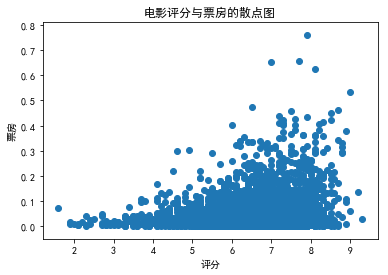

In [21]:
# 电影评分与票房的关系散点图
plt.scatter(x=data.imdb_score,y=data.gross/1000000000)
plt.xlabel('评分')
plt.ylabel('票房')
plt.title('电影评分与票房的散点图')
plt.show()

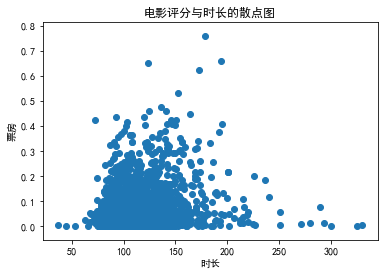

In [22]:
# 电影时长与票房的关系散点图
plt.scatter(x=data.duration,y=data.gross/1000000000)
plt.xlabel('时长')
plt.ylabel('票房')
plt.title('电影评分与时长的散点图')
plt.show()

- 从电影时长与票房的关系可见，电影时长过短或过长票房效果都不佳，一般电影时长在90~160分钟最佳

### 电影评分相关分析

In [23]:
# 评分排名top20的电影片名和评分
score_top20 = data.sort_values(['imdb_score'],ascending=False).head(20)
score_top20[['movie_title','imdb_score']]

movie_title  imdb_score
1937                          The Shawshank Redemption          9.3
3466                                     The Godfather          9.2
66                                     The Dark Knight          9.0
2837                            The Godfather: Part II          9.0
4498                    The Good, the Bad and the Ugly          8.9
339      The Lord of the Rings: The Return of the King          8.9
3355                                      Pulp Fiction          8.9
1874                                  Schindler's List          8.9
2051    Star Wars: Episode V - The Empire Strikes Back          8.8
683                                         Fight Club          8.8
836                                       Forrest Gump          8.8
97                                           Inception          8.8
270   The Lord of the Rings: The Fellowship of the R...         8.8
340              The Lord of the Rings: The Two Towers          8.7
4029                                       City of God          8.7
1903                                        Goodfellas          8.7
654                                         The Matrix          8.7
3024                Star Wars: Episode IV - A New Hope          8.7
4747                                     Seven Samurai          8.7
3867                   One Flew Over the Cuckoo's Nest          8.7

#### 评分前20位的电影主要有《肖申克的救赎》《教父》《蝙蝠侠：黑暗骑士》《教父2》和《黄金三镖客》等



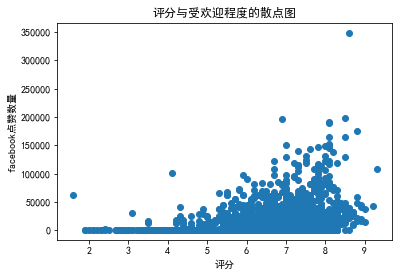

In [24]:
# 评分与受欢迎程度的散点图,与评分与票房图类似
plt.scatter(x=data.imdb_score,y=data.movie_facebook_likes)
plt.xlabel('评分')
plt.ylabel('facebook点赞数量')
plt.title('评分与受欢迎程度的散点图')
plt.show()

#### 电影等级相关分析

In [25]:
rat = data['content_rating'].value_counts()
rat

R            1687
PG-13        1291
PG            563
G              87
Not Rated      34
Unrated        22
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

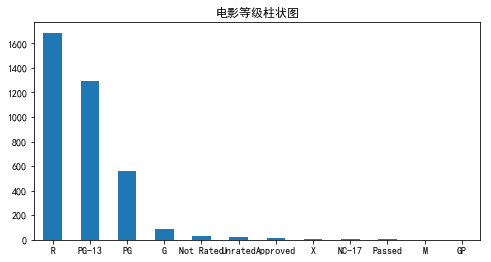

In [26]:
rat.plot(kind='bar',figsize=(8,4))
plt.xticks(rotation=0)
plt.title('电影等级柱状图')
plt.show()

#### 可以看到R、PG-13、PG占据了大部分。

- R(限制级，建议17岁以上观看):《死侍》、《JOKER》、《黑客帝国》、《耶稣受难记》

- PG-13(特别辅导级，建议13岁后儿童观看):《泰坦尼克号》、《盗梦空间》、《哈利·波特》系列、《暮光之城》系列

- PG(辅导级，该级别电影中的一些内容可能不适合儿童观看):《少年派的奇幻漂流》《王牌大贱谍》系列、杰《特别小特工》系列、《波普先生的企鹅》、《雷蒙·斯尼奇的不幸历险》

### 导演相关分析
- 评分排名前20位的导演
- 拍摄电影数最多的前10位导演
- 票房排名前10位的导演

In [27]:
# 评分排名前20位的导演
score_top20['director_name'].reset_index(drop=True)

0           Frank Darabont
1     Francis Ford Coppola
2        Christopher Nolan
3     Francis Ford Coppola
4             Sergio Leone
5            Peter Jackson
6        Quentin Tarantino
7         Steven Spielberg
8           Irvin Kershner
9            David Fincher
10         Robert Zemeckis
11       Christopher Nolan
12           Peter Jackson
13           Peter Jackson
14      Fernando Meirelles
15         Martin Scorsese
16          Lana Wachowski
17            George Lucas
18          Akira Kurosawa
19            Milos Forman
Name: director_name, dtype: object

In [28]:
# 拍摄电影数最多的前10位导演
movice_count =  data.groupby('director_name').size().sort_values(ascending=False)
movice_count[:20]

director_name
Steven Spielberg     25
Clint Eastwood       19
Woody Allen          19
Ridley Scott         17
Tim Burton           16
Steven Soderbergh    16
Martin Scorsese      16
Renny Harlin         15
Spike Lee            15
Robert Rodriguez     13
Barry Levinson       13
Michael Bay          13
Oliver Stone         13
Ron Howard           13
Robert Zemeckis      13
Joel Schumacher      12
Sam Raimi            12
John Carpenter       12
Tony Scott           12
Shawn Levy           11
dtype: int64

In [29]:
# 票房排名top15的导演
gross_top20[['director_name','gross']].drop_duplicates(keep='first')[:10].reset_index(drop=True)

director_name        gross
0      James Cameron  760505847.0
1      James Cameron  658672302.0
2    Colin Trevorrow  652177271.0
3        Joss Whedon  623279547.0
4  Christopher Nolan  533316061.0
5       George Lucas  474544677.0
6       George Lucas  460935665.0
7        Joss Whedon  458991599.0
8  Christopher Nolan  448130642.0
9     Andrew Adamson  436471036.0

In [30]:
# 导演总票房
data.groupby('director_name').sum()['gross'].sort_values(ascending=False)[:10]

director_name
Steven Spielberg     4.114233e+09
Peter Jackson        2.289968e+09
Michael Bay          2.231243e+09
Tim Burton           2.071275e+09
Sam Raimi            2.049549e+09
James Cameron        1.948126e+09
Christopher Nolan    1.813228e+09
George Lucas         1.741418e+09
Robert Zemeckis      1.619309e+09
Chris Columbus       1.618708e+09
Name: gross, dtype: float64

### 盈利情况
##### 电影票房-电影成本

In [31]:
gain = (data['gross'] - data['budget']).sort_values(ascending=False)

# 电影盈利排行索引
gain_index = gain.index.values
# 对应导演名
director = data.loc[gain_index,'director_name']

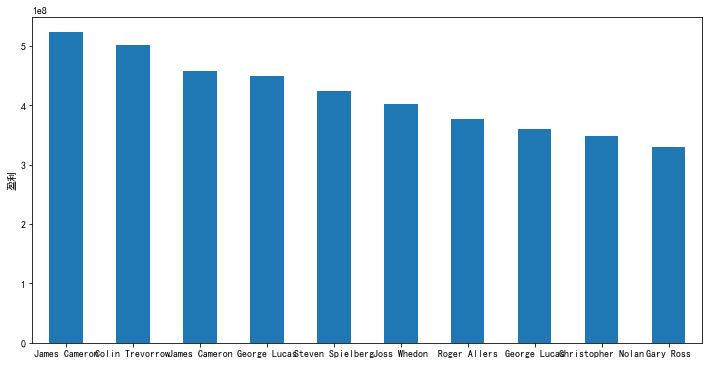

In [32]:
# top10
plt.figure(figsize=(12,6))
gain[:10].plot(kind='bar')
plt.xticks(ticks=range(10),labels=director[:10],rotation=0)
plt.ylabel('盈利')
plt.show()

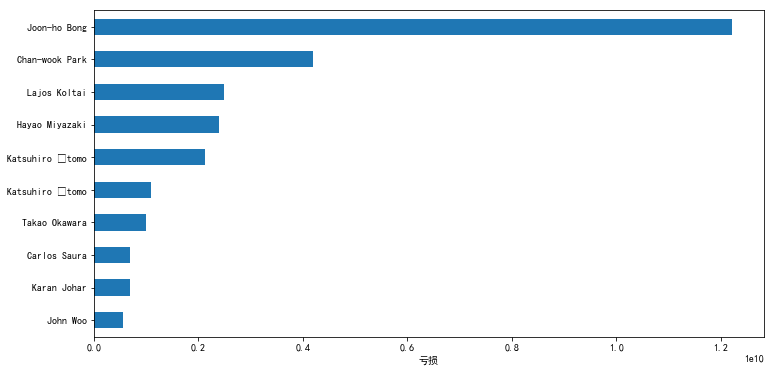

In [33]:
# 倒数10
plt.figure(figsize=(12,6))
gain[-10:].abs().plot(kind='barh')
plt.yticks(ticks=range(10),labels=director[-10:])
plt.xlabel('亏损')
plt.show()